#    神经网络分类
    

## 摘要
神经网络一般由多层，每层有多个节点组成。而生物的神经网络就更加复杂了，几十万亿，几千万亿的神经单元组成！！能够构成复杂逻辑与决策，CPU的基带信号是简单的方波，而这些方波经过变化组合能够表达复杂的信号，声音，视频，以及运算，本文也从这个角度引申出复杂世界的简化，以阐述神经网络的组成。

# 神经元
伸进元是最简单的神经网络，是神经网络的组成单元
包括

1）输入数据

2）每个输入的权重

3）激活函数输出

神经元虽然简单单一，但是能够做最微小基本的信息数据单元处理，可以进行线性处理与分类！！！

神经网络的基本元素，一般用Rosenblatt 感知器表示，其原理可以用下图表示：
<img style="float: center;" src="nural.jpg" width="20%">
                    图1. 人工神经元模型

图中x1~xn是从其他神经元传来的输入信号
wij表示表示从神经元j到神经元i的连接权值
θ表示一个阈值 ( threshold )，或称为偏置( bias )。
则神经元i的输出与输入的关系表示为：
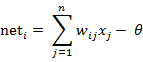


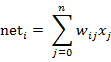
图中 yi表示神经元i的输出，函数f称为激活函数 ( Activation Function )或转移函数 ( Transfer Function ) ，net称为净激活(net activation)。若将阈值看成是神经元i的一个输入x0的权重wi0,则上面的式子可以简化为：
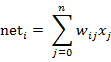

若用X表示输入向量，用W表示权重向量，即：
X = [ x0 , x1 , x2 , ....... , xn ]
w=[ w0 , w1 , w2 , ....... , wn ]T
则神经元的输出可以表示为向量相乘的形式：






若神经元的净激活net为正，称该神经元处于激活状态或兴奋状态(fire)，若净激活net为负，则称神经元处于抑制状态
这种“阈值加权和”的神经元模型称为M-P模型 ( McCulloch-Pitts Model )，也称为神经网络的一个处理单元( PE, Processing Element )

激活函数的选择是构建神经网络过程中的重要环节，下面简要介绍常用的激活函数

(1) 线性函数 ( Liner Function )


(2) 斜面函数 ( Ramp Function )

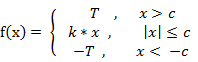

在神经网络中，激活函数的作用是能够给神经网络加入一些非线性因素，使得神经网络可以更好地解决较为复杂的问题。

(3) Sigmod Function

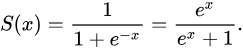



函数图像如下
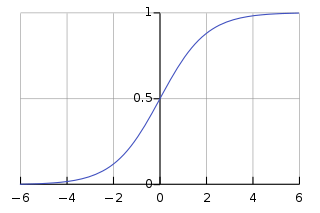

在神经网络中，激活函数的作用可以看作是从原始特征学习出新特征，或者说是将原始特征从低维空间映射到高维空间。多层级联的结构加上激活函数，令多层神经网络可以逼近任意函数，从而可以学习出非常复杂的假设函数。

以下是几种简单线性可分函数 用神经网络去学习模型的示例

## 使用单一神经元学习OR 函数模型
逻辑或，在电路信号与系统中，表示逻辑与,使用一个神经元来学习该函数，该神经元结果如下
该处硬限幅函数类比与信号与系统中阶跃函数，在处理信号时，t>0时刻的信号输出为1，其他时刻为0 

则该单一神经元定义如下
w=np.array([b,0,0])     # 神经网络初始权值向量---
### 定义硬限幅函数，阶跃函数
def sgn(v):
        if v>0:
                return 1
        else:
                return 0
### 神经网络的神经元
def comy(myw,myx):
    return sgn(np.dot(myw.T,myx))
   
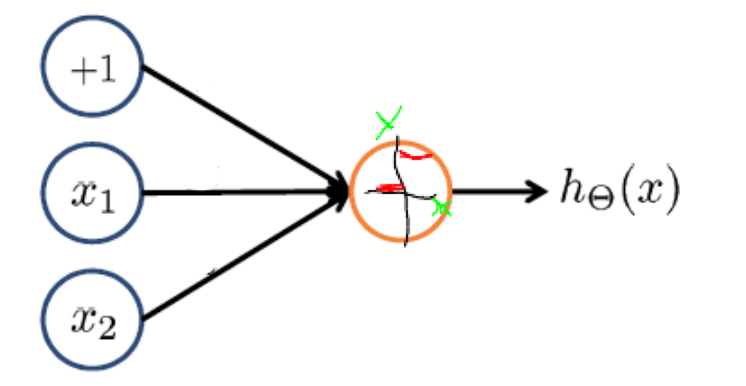

### 更新权重以及训练
def neww(oldw,myd,myx,a):  # 权值的更新过程 ------

        return oldw+a*(myd-comy(oldw,myx))*myx
        
训练完成后权重： [ 0.   0.5  0.5]
学习完成的神经网络函数模型：y = x1*0 + x2*0 + 0

使用该模型对输入进行处理结果如下，跟or输出逻辑一致

1 or 1 => 1 结果： 1

1 or 0 => 1 结果： 1

0 or 0 => 0 结果： 0

0 or 1 => 1 结果： 1

In [23]:
def neww(oldw,myd,myx,a):  # 权值的更新过程 ------
        return oldw+a*(myd-comy(oldw,myx))*myx
print('训练完成后权重： {}'.format(w))
print('学习完成的神经网络函数模型：y = x1*%d + x2*%d + %d'%(w[1], w[2],w[0]))

训练完成后权重： [ 0.   0.5  0.5]
学习完成的神经网络函数模型：y = x1*0 + x2*0 + 0


In [24]:
for xn in x:
    print ("%d or %d => %d 结果："%(xn[1],xn[2],comy(w,xn)), xn[1] or xn[2])

1 or 1 => 1 结果： 1
1 or 0 => 1 结果： 1
0 or 0 => 0 结果： 0
0 or 1 => 1 结果： 1


## 两类线性可分分割面的学习 
给出属于2维平面上两类点，可以找到分割面的点，使用神经元对其进行分类
给定俩个集合的点，并使用单神经元进行分割线的学习。
在每次预测过程中如果神经元对结果判定正确，输出大于0 ，则不对原始输入的权重修改，否则对权重进行梯度加权

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
b = 1  #偏置
a = 0.5 #
x = np.array([[1,1,3],[1,2,3],[1,1,8],[1,2,15]])

d = np.array([1,1,-1,-1])#样本所属类别
w = np.array([b,0,0])
wucha = 0
ddcount = 50
# 定义神经网络节点的输出，该处使用的是
def sgn(v):v>0 and 1 or -1#--------------------------
def sgn(v):
    if v>0:
        return 1
    else:
        return -1

def comy(myw,myx):
    return sgn(np.dot(myw.T,myx))
def tiduxz(myw,myx,mya):
    i = 0
    sum_x = np.array([0,0,0])
    for xn in myx:
        if comy(myw,xn)!=d[i]:
            sum_x += d[i]*xn            
        i+=1
    return mya*sum_x
# 训练过程
i=0
print('权重更新过程如下：')
while True:
    tdxz = tiduxz(w,x,a)
    print(w)
    w= w + tdxz
    i = i+1
    if abs(tdxz.sum())<= wucha or i>=ddcount:break
        


权重更新过程如下：
[1 0 0]
[  0.   -1.5 -11.5]
[ 1.   0.  -8.5]
[ 2.   1.5 -5.5]
[ 3.   3.  -2.5]
[ 3.5  3.5 -1. ]


分界(类）线方程：y = 0x1 + 0x2 + 0


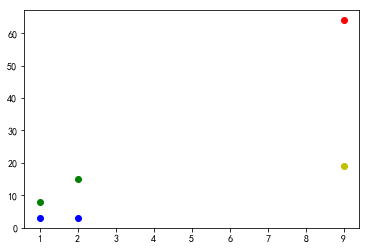

(9,19) 黄色点该点属于哪个类别: 蓝色 
(9,64) 红色该点属于哪个类别: 蓝色 


In [25]:
plt.plot([1,2],[3,3], 'ro' ,color = 'b', label='1')
plt.plot([1,2],[8,15], 'ro', color = 'g', label='2')
print('分界(类）线方程：y = %dx1 + %dx2 + %d'%(w[1],w[2],w[0]))

d = np.array([1,1,-1,-1])#样本所属类别
plt.plot(9,19,  'ro' ,color = 'y')
plt.plot(9,64, 'ro',color = 'r')
plt.show()        
def n(x):
    a ='蓝色' if x>0 else "绿色"
    return a
test = np.array([b,9,19])
print('(9,19) 黄色点该点属于哪个类别: %s ' % n(comy(w,test)))
test = np.array([b,9,64])
print('(9,64) 红色该点属于哪个类别: %s ' % n(comy(w,test)))

## 对于非线性可分 

Rosenblatt 感知器的局限性 只适用于线性方程分类，不适用于非线性分类
逻辑回归的决策平面是线性的，所以，它一般只能够解决样本是线性可分的情况。
如果样本呈现非线性的时候，我们可以引入多项式回归。
一般多项式回归将基本信息分解到高阶多项式组合，类似于信号系统中，基本方波信号是有多个频次的分量叠加而成
如下图：圆内园外的分界线函数，通过转化变成了x1, x2 的2次方组合形式。如果直接使用x1,x2作为神经网络的输入，则无法通过单神经元训练出分界函数目标！

图片引用吴恩达机器学习笔记

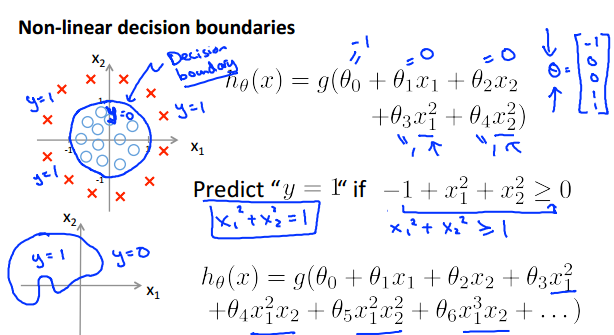

再看看信号的分解：
如下图示，两个频率不同的正弦波经过叠加变成了一个阶梯方波，虽然不是标注的方波如PWM波，但是经过再增加多阶词谐波后可以变成标准方波信号
方波信号可用傅里叶变换分解成频率、幅值不等的规则正弦波
最容易理解的方式就是：傅里叶级数
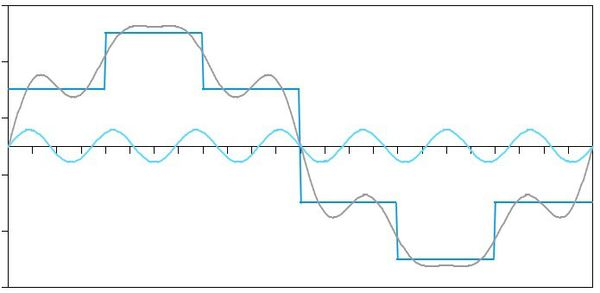

随着叠加的递增，所有正弦波中上升的部分逐渐让原本缓慢增加的曲线不断变陡，而所有正弦波中下降的部分又抵消了上升到最高处时继续上升的部分使其变为水平线。一个矩形就这么叠加而成了。
但是要多无穷多个正弦波叠加起来才能形成一个标准 90 度角的矩形波

下图表达了一个方波信号的组成，包括时域和频域
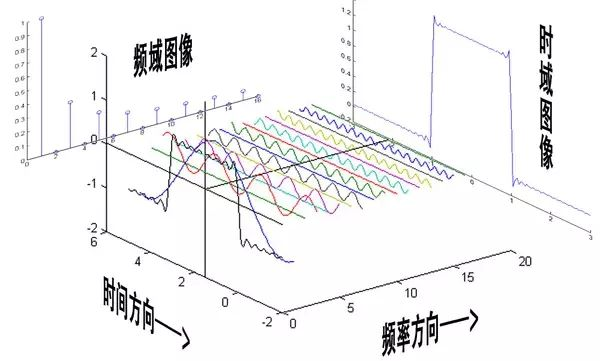

机器学习的目标，也是有很多字段，维度组成，再复杂的事物，规律都是由基本的单元不同的幅，频等参数的组合
现在复杂的信号，通信网络等都是由基本的单元组成的，神经网络也是这样。对于线性不可分学习目标
其学习的目标y 可以分解为多个变量的组合，而这些变量，或者描述的字段是
可以转化为：
（1）一个原始信号的在多个不同神经叠加，也就是多个神经元组成
（2）原始信号经过变换再经过一个神经元。这种方式最常见的是逻辑回归分类器，以及SVM支持向量机

逻辑回归 跟 神经网络的区别：

    多项式回归也可以看成是线性回归或者逻辑回归的一个特例——将线性回归或者逻辑回归的特征x转化为x2,x3…等非线性的特征组合，然后对其进行线性的拟合。
    
    多项式回归虽然能够解决非线性问题，但需要人工构造非线性的特征
    
神经网络：既能够应付样本非线性可分的情况，又同时能够自动构造非线性的特征 

以下构造一个三个类别的数据，并用神经网络对其进行分类
该数据有两个维度：x, y



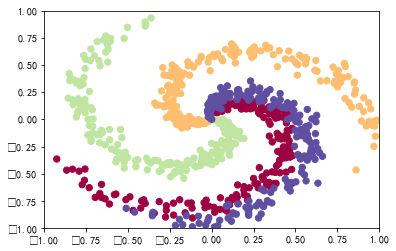

In [17]:
import numpy as np  
import matplotlib.pyplot as plt  
class data(object):  
    def __init__(self):  
        self.K = 4 # 种类  
        self.N = 200 # 每种的数量  
        self.D = 2 # 样品的维度  
        self.number = self.K * self.N #总数量  
        self.X = np.zeros((self.number, self.D))  
        self.Y = np.zeros(self.number,dtype='uint8')  
        for i in range(self.K):  
            ix = range(i * self.N, (i+1)*self.N)  
            r = np.linspace(0.0, 1, self.N)  
            t = np.linspace(i * 4, (i+1) * 4,self.N) + np.random.randn(self.N) * 0.2  
            self.X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]  
            self.Y[ix] = i  
    def show(self):  
        fig = plt.figure()  
        plt.scatter(self.X[:,0], self.X[:,1], c=self.Y, s=40, cmap=plt.cm.Spectral)  
        plt.xlim([-1, 1])  
        plt.ylim([-1, 1])  
        plt.show()  
    def get_x(self):
        return self.X,self.Y
  
a = data()  
a.show()  

In [18]:
import numpy as np  
import matplotlib.pyplot as plt  
# from Classify.linear_Classify import data  
class NNCla(object):  
    def __init__(self,n,k,d,x,y,h):  
        self.n = n  
        self.k = k  
        self.d = d  
        self.x = x  
        self.y = y  
        self.h = h  
        self.reg = 1e-3  
        self.step = 1e-0  
        self.number = self.k * self.n  
        self.w0 = 0.01 * np.random.randn(self.d, self.h)  
        self.b0 = np.zeros((1, self.h))  
        self.w1 = 0.01 * np.random.randn(self.h, self.k)  
        self.b1 = np.zeros((1, self.k))  
    def get_loss(self):  
        x = self.x  
        y = self.y  
        k = self.k  
        n = self.n  
        d = self.d  
        h = self.h  
        # 前向传播，使用的数学模型是： y = WX + b ||| W shape是（2,m） x 是（m，2）
        h1, cache1 = self.affine_relu_forward(x, self.w0, self.b0)  
        out, cache2 = self.affine_forward(h1, self.w1,self.b1)  
        score = out  
        loss, dx = self.softmax_loss(score, y)  
        reg_loss = 0.5 * self.reg * np.sum(self.w0 * self.w0) + 0.5 * self.reg * np.sum(self.w1 * self.w1)  
        loss = loss + reg_loss  
  
        """ 
        反向传播 
        """  
        dh1, dw1, db1 = self.affine_backward(dx, cache2)  
        dscore, dw0, db0 = self.affine_relu_backward(dh1, cache1)  
        dw1 += self.reg * self.w1  
        dw0 += self.reg * self.w0  
        self.w0 -= self.step * dw0  
        self.b0 -= self.step * db0  
        self.w1 -= self.step * dw1  
        self.b1 -= self.step * db1  
  
        return loss  
  
    def affine_relu_forward(self,x, w, b):  
        a, fc_cache = self.affine_forward(x, w, b)  
        out, relu_cache = self.relu_forward(a)  
        cache = (fc_cache, relu_cache)  
        return out, cache  
  
    def affine_forward(self,x, w, b):  
        out = None  
        # Reshape x into rows  
        N = x.shape[0]  
        x_row = x.reshape(N, -1)  # (N,D)  
        out = np.dot(x_row, w) + b  # (N,M)  
        cache = (x, w, b)  
  
        return out, cache  
  
    def relu_forward(self,x):  
        out = None  
        out = ReLU(x)  
        cache = x  
  
        return out, cache  
  
    def softmax_loss(self,x, y):  
        probs = np.exp(x - np.max(x, axis=1, keepdims=True))  
        probs /= np.sum(probs, axis=1, keepdims=True)  
        N = x.shape[0]  
        loss = -np.sum(np.log(probs[np.arange(N), y])) / N  
        dx = probs.copy()  
        dx[np.arange(N), y] -= 1  
        dx /= N  
  
        return loss, dx  
  
    def affine_backward(self,dout, cache):  
        x, w, b = cache  
        dx, dw, db = None, None, None  
        dx = np.dot(dout, w.T)  # (N,D)  
        dw = np.dot(x.T, dout)  # (D,M)  
        db = np.sum(dout, axis=0, keepdims=True)  # (1,M)  
  
        return dx, dw, db  
  
    def relu_backward(self,dout, cache):  
        dx, x = None, cache  
        dx = dout  
        dx[x <= 0] = 0  
  
        return dx  
  
    def affine_relu_backward(self,dout, cache):  
        fc_cache, relu_cache = cache  
        da = self.relu_backward(dout, relu_cache)  
        dx, dw, db = self.affine_backward(da, fc_cache)  
        return dx, dw, db  
  
    def show(self):  
        X = self.x  
        W = self.w0  
        b = self.b0  
        W2 = self.w1  
        b2 = self.b1  
        y = self.y  
        h = 0.02  
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),  
                             np.arange(y_min, y_max, h))  
        Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2  
        Z = np.argmax(Z, axis=1)  
        Z = Z.reshape(xx.shape)  
        fig = plt.figure()  
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)  
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)  
        plt.xlim(xx.min(), xx.max())  
        plt.ylim(yy.min(), yy.max())  
        plt.show()  


In [19]:
#n,k,d,x,y,h  
def ReLU(x):  
    """ReLU non-linearity."""  
    return np.maximum(0, x)  
a = data()  
a = NNCla(300, a.K, a.D, a.X, a.Y,100)  
loss = []
for i in range(2000):  # 训练迭代次数
    loss.append(a.get_loss())  

### 分类结果如下

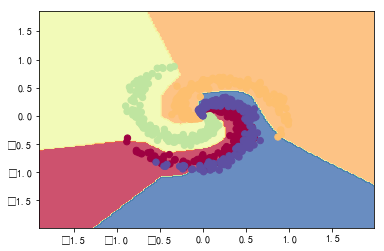

In [20]:
a.show()  

In [16]:
print(loss[0:10])
print(loss[len(loss)-10:len(loss)])

[1.0985893634589019, 1.0983227374057907, 1.098049339781537, 1.0977723546468368, 1.0974610657446744, 1.0970971669422258, 1.0966698942415054, 1.0961597973141288, 1.0955526142067271, 1.094820272413739]
[0.27394654576097355, 0.27405425767381852, 0.27391342783966599, 0.27401857539837327, 0.27388574450663328, 0.27398961460731469, 0.27386360085348971, 0.27394220150456455, 0.27378626438275189, 0.2738629474564333]


##  参考资料
1： 吴恩达-深度学习
2： 机器学习--